<div style="background:linear-gradient(120deg,#00f5a0,#00d9f5,#b95cff); color:black; font-weight:800; padding:18px; border-radius:20px; text-align:center; font-size:60px;">
SALES DATA 
</div>

<div style="background-color:#1e293b; color:#facc15; font-weight:800; padding:18px; border-radius:18px; text-align:center; font-size:30px; box-shadow:0 0 25px #facc15;">
IMPORT LIBRARIES,ALGORITHM AND METRICS
</div>

In [1]:
!pip install termcolor


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
warnings.filterwarnings("ignore")

<div style="background-color:#1e293b; color:#facc15; font-weight:800; padding:18px; border-radius:18px; text-align:center; font-size:30px; box-shadow:0 0 25px #facc15;">
LOAD SALES DATASET
</div>

In [3]:
sl_df=pd.read_csv(r"C:\Users\Ashfidha\Downloads\sales_data.csv")

In [4]:
sl_df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


<div style="background-color:#1e293b; color:#facc15; font-weight:800; padding:18px; border-radius:18px; text-align:center; font-size:30px; box-shadow:0 0 25px #facc15;">
CHECKING SHAPE AND COLUMNS
</div>

In [5]:
sl_df.shape

(1000, 14)

In [6]:

sl_df.columns

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')

| **Column Name**          | **Description**                                                       |
| ------------------------ | --------------------------------------------------------------------- |
| **Product_ID**           | Unique identifier for each product.                                   |
| **Sale_Date**            | Date when the sale occurred.                                          |
| **Sales_Rep**            | Name or ID of the sales representative who made the sale.             |
| **Region**               | Geographical region where the sale took place.                        |
| **Sales_Amount**         | Total monetary value of the sale.                                     |
| **Quantity_Sold**        | Number of units sold in each transaction.                             |
| **Product_Category**     | Category or type of the product (e.g., electronics, clothing).        |
| **Unit_Cost**            | Cost per unit of the product sold.                                    |
| **Unit_Price**           | Selling price per unit of the product.                                |
| **Customer_Type**        | Type of customer (e.g., new, returning).                              |
| **Discount**             | Discount applied to the sale, either as a percentage or fixed amount. |
| **Payment_Method**       | Method used by the customer to pay (e.g., credit card, cash).         |
| **Sales_Channel**        | Channel through which the sale was made (e.g., online, in-store).     |
| **Region_and_Sales_Rep** | Combined column of **Region_**                                          |


<div style="background:#fff; color:#4a148c; font-weight:700; padding:18px; border-radius:18px; text-align:center; font-size:30px; border:4px solid transparent; background-clip:padding-box; box-shadow:0 0 0 4px #ea1438ff;">
DATA PRE-PROCESSING
</div>

<div style="background-color:#1e293b; color:#facc15; font-weight:800; padding:18px; border-radius:18px; text-align:center; font-size:30px; box-shadow:0 0 25px #facc15;">
MISSING VALUES HANDLING
</div>

In [7]:
sl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [8]:
sl_df.isnull().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

for i in sl_df.columns:
    print(i,':-')
    print(sl_df[i].unique())

<div style="background-color:#1e293b; color:#facc15; font-weight:800; padding:18px; border-radius:18px; text-align:center; font-size:30px; box-shadow:0 0 25px #facc15;">
DROPING UNWANTED COLUMNS
</div>

In [10]:
sl_df.drop(['Product_ID', 'Sale_Date'], axis=1, inplace=True)
s_df = sl_df


In [11]:
s_df

,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie
996,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob
997,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David
998,David,West,1629.47,39,Electronics,3685.03,3743.39,New,0.01,Bank Transfer,Online,West-David


In [12]:
s_df.columns

Index(['Sales_Rep', 'Region', 'Sales_Amount', 'Quantity_Sold',
       'Product_Category', 'Unit_Cost', 'Unit_Price', 'Customer_Type',
       'Discount', 'Payment_Method', 'Sales_Channel', 'Region_and_Sales_Rep'],
      dtype='object')

<div style="background-color:#1e293b; color:#facc15; font-weight:800; padding:18px; border-radius:18px; text-align:center; font-size:30px; box-shadow:0 0 25px #facc15;">
ENCODING
</div>

Encoding converts categorical data into numerical format for machine learning models.

In [13]:
le = LabelEncoder()

categorical_cols=['Sales_Rep', 'Region', 'Sales_Amount', 'Quantity_Sold',
 'Product_Category', 'Unit_Cost', 'Unit_Price', 'Customer_Type',
 'Discount', 'Payment_Method', 'Sales_Channel', 'Region_and_Sales_Rep']

for col in categorical_cols:
    s_df[col] = le.fit_transform(s_df[col])


In [14]:
s_df

,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1,1,504,17,3,24,8,1,9,1,0,6
1,1,3,438,16,3,775,793,1,11,1,1,16
2,3,2,461,29,2,42,18,1,20,0,1,13
3,1,2,204,38,0,881,862,0,2,2,1,11
4,2,0,375,12,1,127,79,0,8,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,474,3,2,988,999,1,29,1,0,7
996,1,1,472,36,0,359,326,0,21,0,1,6
997,3,2,763,16,0,63,26,1,6,0,0,13
998,3,3,142,38,1,744,704,0,1,0,0,18


<div style="background-color:#1e293b; color:#facc15; font-weight:800; padding:18px; border-radius:18px; text-align:center; font-size:30px; box-shadow:0 0 25px #facc15;">
SCALING
</div>

Scaling is the process of adjusting the range of feature values in a dataset so they have comparable magnitudes, improving model performance

In [15]:
scaler=StandardScaler()

In [16]:
scaled=scaler.fit_transform(s_df)

In [17]:
X = scaled

In [18]:
X

array([[-0.73524473, -0.40152804,  0.01769548, ..., -0.00361948,
        -1.02429504, -0.57268204],
       [-0.73524473,  1.37908409, -0.21148456, ..., -0.00361948,
         0.97628121,  1.16114188],
       [ 0.66789407,  0.48877803, -0.13161879, ..., -1.21011156,
         0.97628121,  0.6409947 ],
       ...,
       [ 0.66789407,  0.48877803,  0.91705352, ..., -1.21011156,
        -1.02429504,  0.6409947 ],
       [ 0.66789407,  1.37908409, -1.23932233, ..., -1.21011156,
        -1.02429504,  1.50790666],
       [-1.43681413, -1.2918341 , -0.02744605, ..., -0.00361948,
        -1.02429504, -1.61297639]])

Unsupervised learning

<div style="background-color:#1e293b; color:#facc15; font-weight:800; padding:18px; border-radius:18px; text-align:center; font-size:30px; box-shadow:0 0 25px #facc15;">
K MEANS
</div>

As previously explained, K-means is a clustering algorithm that divides data into 
𝐾
K clusters based on similarity, using centroids to represent each cluster.

  File "C:\Users\Ashfidha\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Ashfidha\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ashfidha\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ashfidha\anaconda3\Lib

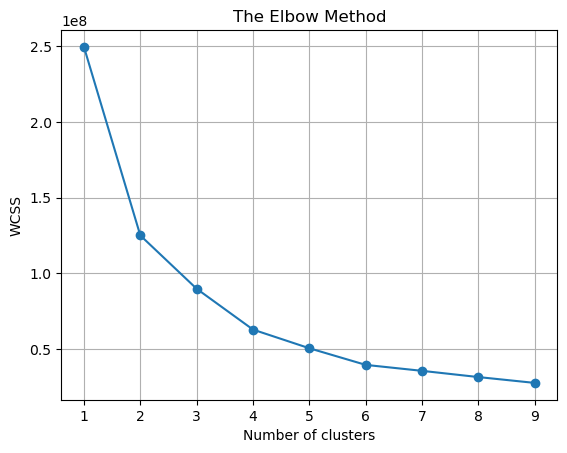

In [19]:


X = s_df.select_dtypes(include=['int64', 'float64'])

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Conclusion:

The Elbow Method is used to find the optimal number of clusters in a dataset. From the plot, it appears that 2 clusters are optimal because the WCSS drastically drops at the first cluster and then the decrease becomes less pronounced, forming an "elbow" at that point.

In [20]:
s_df.values

array([[  1,   1, 504, ...,   1,   0,   6],
       [  1,   3, 438, ...,   1,   1,  16],
       [  3,   2, 461, ...,   0,   1,  13],
       ...,
       [  3,   2, 763, ...,   0,   0,  13],
       [  3,   3, 142, ...,   0,   0,  18],
       [  0,   0, 491, ...,   1,   0,   0]])

In [21]:
type(s_df)

pandas.core.frame.DataFrame

In [22]:

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [23]:
y_kmeans

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,

In [24]:


score1 = silhouette_score(X, y_kmeans)
print("Silhouette Score:", score1)


Silhouette Score: 0.4249217246279827


<div style="background-color:#1e293b; color:#facc15; font-weight:800; padding:18px; border-radius:18px; text-align:center; font-size:30px; box-shadow:0 0 25px #facc15;">
PCA
</div>

PCA (Principal Component Analysis) is a technique to reduce the number of variables in a dataset by transforming it into a set of uncorrelated principal components that capture the most important information.

In [25]:
pca= PCA(n_components=2)
x_reduced = pca.fit_transform(scaled)

In [26]:
x_reduced

array([[-2.07480829, -1.33597255],
       [ 2.06527557, -0.27309402],
       [-0.88035139, -2.38213805],
       ...,
       [-0.74839752, -2.24638957],
       [ 2.55132991, -0.53475128],
       [-1.1805221 ,  1.5833667 ]])

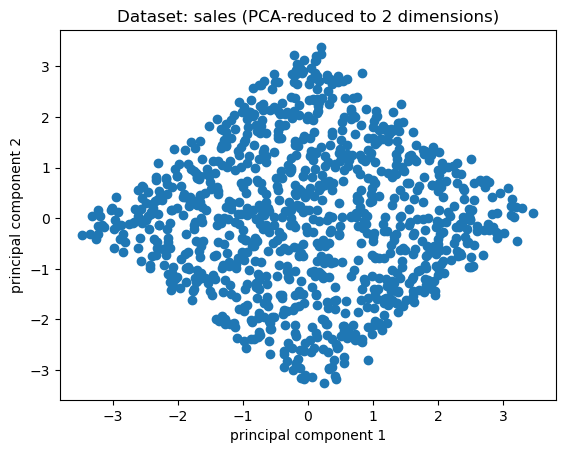

In [27]:
plt.scatter(x_reduced[:, 0], x_reduced[:, 1])
plt.title("Dataset: sales (PCA-reduced to 2 dimensions)")
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()

Conclusion:

This plot is a PCA-reduced 2D visualization of the original sales dataset, where the most important features have been captured by the first two principal components. It helps in understanding the variance in the data and serves as a starting point for further analysis.

<div style="background-color:#1e293b; color:#facc15; font-weight:800; padding:18px; border-radius:18px; text-align:center; font-size:30px; box-shadow:0 0 25px #facc15;">
DBSCAN CLUSTERING
</div>

In [28]:

epsilon = 0.3       
min_samples = 5  

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(x_reduced)


Epsilon (ε): Defines the radius around a point to consider it as a neighbor.

Min_samples: Defines the minimum number of neighbors (including the point itself) required for a point to be considered a core point.

In [29]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

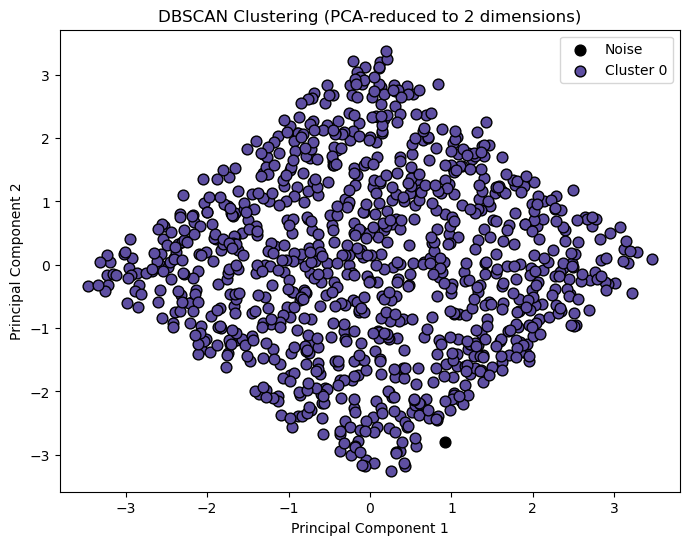

In [30]:


unique_labels = sorted(set(labels))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = (0, 0, 0, 1)

    class_member_mask = (labels == k)
    xy = x_reduced[class_member_mask]

    plt.scatter(
        xy[:, 0],
        xy[:, 1],
        c=[col],
        edgecolors='k',
        s=60,
        label=f"Cluster {k}" if k != -1 else "Noise"
    )

plt.title("DBSCAN Clustering (PCA-reduced to 2 dimensions)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


The plot you've uploaded represents the results of **DBSCAN clustering** on a dataset that has been reduced to **2 dimensions** using **Principal Component Analysis (PCA)**.

### Key Components of the Plot:

1. **x-axis (Principal Component 1)**:

   * This is the first principal component from the **PCA** transformation, capturing the highest variance in the data.

2. **y-axis (Principal Component 2)**:

   * This is the second principal component, which captures the second-highest variance in the data.

3. **Cluster 0 (Purple)**:

   * The points labeled as **Cluster 0** are part of the cluster identified by the **DBSCAN algorithm**.
   * These points are closely grouped together in the reduced 2D space and are considered **dense enough** to be part of the same cluster.

4. **Noise (Black)**:

   * The **black point** represents a **noise point** identified by DBSCAN. This point does not have enough neighboring points within the **ε-radius** to form a cluster, meaning it is considered **outlier** or noise.
   * In DBSCAN, noise points are not assigned to any cluster.

5. **Scatter Plot**:

   * Each point represents an individual data point from the original dataset, projected into the two principal components.
   * Points that are part of **Cluster 0** are colored **purple**, while the **noise point** is colored **black**.

### Interpretation:

* The plot shows the result of **DBSCAN clustering** after reducing the data to **2 dimensions using PCA**.
* **Cluster 0** consists of most of the data points, forming a dense grouping, while a **single point** is identified as **noise** (black dot), meaning it does not fit well into any of the clusters.
* DBSCAN is effective for identifying clusters of varying shapes and sizes and can also identify outliers or noise that do not belong to any cluster.

### Conclusion:

This plot shows the result of **DBSCAN clustering** applied to the **PCA-reduced dataset**, where most points form **Cluster 0** and a single point is marked as **noise**. The color coding helps differentiate between the core clusters and noise points effectively.


In [31]:
unique_labels

[np.int64(-1), np.int64(0)]

In [32]:
score2 = silhouette_score(x_reduced, labels)
print("Silhouette Score:", score2)

Silhouette Score: 0.1443165164818447


<div style="background:#fff; color:#4a148c; font-weight:700; padding:18px; border-radius:18px; text-align:center; font-size:30px; border:4px solid transparent; background-clip:padding-box; box-shadow:0 0 0 4px #ce93d8;">
HEIRARCHICAL CLUSTERING
</div>

Hierarchical Clustering is a type of clustering algorithm that builds a hierarchy of clusters either by agglomeration (bottom-up) or division (top-down).

<div style="background-color:#1e293b; color:#facc15; font-weight:800; padding:18px; border-radius:18px; text-align:center; font-size:30px; box-shadow:0 0 25px #facc15;">
DENDROGRAM CLUSTERING
</div>

 dendrogram is a tree-like diagram that visually represents the hierarchical structure of a clustering process. It shows how clusters are merged or split at each step of the clustering algorithm, often used in hierarchical clustering.

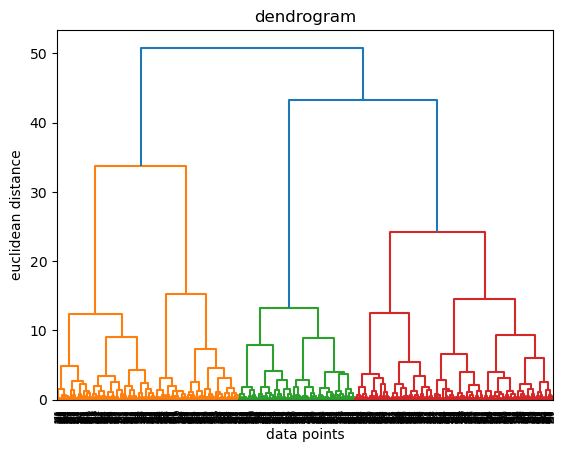

In [33]:
dendrogram=sch.dendrogram(sch.linkage(x_reduced,method='ward'))
plt.title('dendrogram')
plt.xlabel('data points')
plt.ylabel('euclidean distance')
plt.show()

Conclusion:

This dendrogram represents the result of a Hierarchical Clustering analysis. It shows how data points are merged into clusters at increasing levels of dissimilarity (Euclidean distance). By examining the plot, you can visually assess the structure of the data and decide on an appropriate number of clusters by cutting the tree at a specific height.

<div style="background-color:#1e293b; color:#facc15; font-weight:800; padding:18px; border-radius:18px; text-align:center; font-size:30px; box-shadow:0 0 25px #facc15;">
AGGLOMERATIVE CLUSTERING
</div>

Agglomerative Clustering is a bottom-up hierarchical clustering method. It starts with each data point as its own cluster and repeatedly merges the closest clusters until all points form one cluster or a desired number of clusters is reached.

In [34]:
ahc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_ahc=ahc.fit_predict(x_reduced)
y_ahc

array([2, 0, 3, 1, 2, 3, 0, 0, 3, 0, 1, 3, 3, 1, 1, 2, 1, 4, 0, 1, 1, 4,
       4, 3, 1, 4, 2, 4, 0, 1, 3, 1, 2, 0, 4, 3, 2, 4, 2, 2, 0, 1, 0, 1,
       3, 4, 0, 0, 0, 4, 2, 1, 1, 0, 0, 4, 1, 4, 4, 1, 4, 4, 0, 1, 1, 4,
       1, 4, 4, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 3, 2,
       4, 0, 4, 2, 2, 2, 4, 3, 0, 3, 1, 0, 3, 1, 0, 3, 4, 4, 1, 2, 3, 2,
       3, 1, 1, 3, 0, 3, 1, 3, 2, 1, 0, 4, 2, 3, 2, 2, 0, 2, 1, 1, 3, 1,
       4, 3, 4, 1, 2, 0, 2, 1, 1, 4, 4, 0, 1, 3, 1, 2, 1, 0, 3, 3, 3, 1,
       0, 4, 0, 1, 2, 3, 4, 4, 2, 3, 2, 1, 3, 1, 0, 2, 0, 1, 1, 1, 1, 1,
       3, 3, 2, 0, 2, 2, 2, 0, 1, 1, 4, 0, 0, 0, 2, 4, 0, 1, 3, 3, 4, 1,
       2, 3, 0, 1, 2, 0, 2, 2, 1, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 0, 1, 4,
       2, 3, 0, 3, 3, 1, 4, 2, 1, 4, 1, 3, 2, 1, 0, 1, 4, 3, 3, 1, 2, 2,
       0, 2, 2, 0, 3, 3, 1, 0, 2, 4, 3, 0, 1, 1, 1, 2, 2, 1, 2, 3, 4, 1,
       0, 3, 1, 3, 2, 1, 3, 3, 1, 2, 3, 2, 0, 3, 1, 1, 2, 1, 2, 2, 0, 3,
       4, 0, 1, 0, 0, 2, 1, 1, 1, 2, 3, 2, 1, 0, 2,

In [35]:
score3 = silhouette_score(x_reduced, y_ahc)
print("Silhouette Score:", score3)

Silhouette Score: 0.3427609749621931


<div style="background-color:#1e293b; color:#facc15; font-weight:800; padding:18px; border-radius:18px; text-align:center; font-size:30px; box-shadow:0 0 25px #facc15;">
FUZZY CLUSTERING
</div>

Fuzzy Clustering allows data points to belong to multiple clusters with varying degrees of membership (between 0 and 1). Unlike traditional clustering, where each point belongs to one cluster, fuzzy clustering gives each point a "soft" classification.

In [36]:
import skfuzzy as fuzz

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

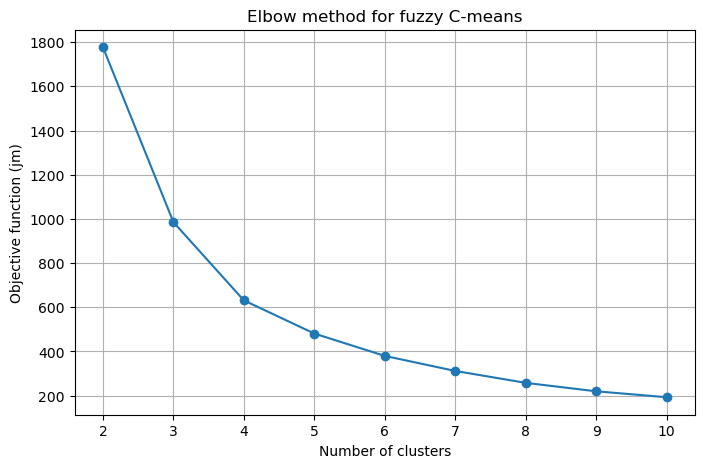

In [37]:
x = x_reduced.T
cluster_range = range(2,11)

jm_values = []

for c in cluster_range:
    cntre, u, u0, d, jm, p, fpc = fuzz._cluster.cmeans(
        x,
        c=c,
        m=2.0,
        error=0.005,
        maxiter=1000,
        init=None
    )
    jm_values.append(jm[-1])
    plt.figure(figsize=(8,5))
plt.plot(cluster_range,jm_values,marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Objective function (jm)")
plt.title("Elbow method for fuzzy C-means")
plt.grid(True)
plt.show()

Conclusion:

This plot is an application of the Elbow Method to help decide the optimal number of clusters for your Fuzzy C-Means clustering. Based on this plot, 4 clusters would be a reasonable choice, as adding more clusters (5, 6, etc.) doesn't significantly reduce the objective function.

In [38]:
n_clusters = 5
m = 1.7
error = 1e-5
maxiter = 1000

In [39]:
cntr, u, u0, d, jm, p, fpc = fuzz._cluster.cmeans(
    x_reduced.T, c=c,m=2.0,error=0.005,maxiter=1000
)
u_transposed = u.T
hard_clusters = np.argmax(u_transposed, axis=1)

score4 = silhouette_score(x_reduced,hard_clusters)
print("Silhouette_Score", score4)


Silhouette_Score 0.36312868139377863


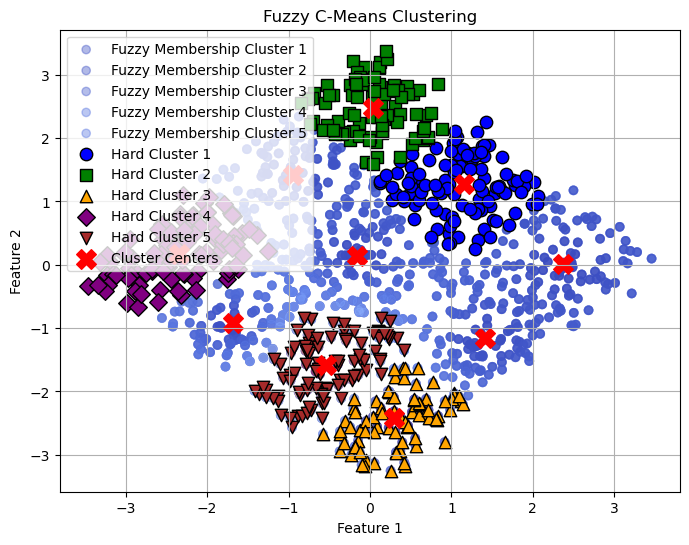

In [41]:


fig, ax = plt.subplots(figsize=(8, 6))

for i in range(n_clusters):
    ax.scatter(
        x_reduced[:, 0],
        x_reduced[:, 1],
        c=u[i],  
        cmap='coolwarm',
        alpha=0.4,
        label=f'Fuzzy Membership Cluster {i+1}'
    )

markers = ['o', 's', '^', 'D', 'v'] 
colors = ['blue', 'green', 'orange', 'purple', 'brown']

for i in range(n_clusters):
    cluster_points = x_reduced[hard_clusters == i]
    ax.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        c=colors[i],  
        marker=markers[i],
        edgecolor='k',
        s=80,
        label=f'Hard Cluster {i+1}'
    )

ax.scatter(
    cntr[:, 0], 
    cntr[:, 1],  
    c='red',     
    marker='X',  
    s=200,       
    label='Cluster Centers'
)

ax.set_title('Fuzzy C-Means Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

ax.legend(loc='upper left')
ax.grid(True) 
plt.show()


The plot provides a visual representation of both the fuzzy membership (degree of belonging to each cluster) and the hard assignment (single cluster assignment based on maximum membership) in a 2D feature space. The red X markers represent the cluster centers, and different colored markers represent data points assigned to different clusters, allowing you to see how the fuzzy algorithm assigns data points with varying degrees of membership.

<div style="background-color:#1e293b; color:#facc15; font-weight:800; padding:18px; border-radius:18px; text-align:center; font-size:30px; box-shadow:0 0 25px #facc15;">
TABLE
</div>

In [42]:
from tabulate import tabulate
table=[['Model','silhouette_score'],['partitional(Kmeans)Clustering',score1],['DBSACN',score2],['HIERARCHY',score3],
       ['fuzzy',score4]]
       
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════════════════════════╤════════════════════╕
│ Model                         │   silhouette_score │
╞═══════════════════════════════╪════════════════════╡
│ partitional(Kmeans)Clustering │           0.424922 │
├───────────────────────────────┼────────────────────┤
│ DBSACN                        │           0.144317 │
├───────────────────────────────┼────────────────────┤
│ HIERARCHY                     │           0.342761 │
├───────────────────────────────┼────────────────────┤
│ fuzzy                         │           0.363129 │
╘═══════════════════════════════╧════════════════════╛


In [43]:
sl_df = pd.DataFrame(sl_df) 
sl_df['Cluster'] = labels

In [44]:
sl_df

,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Cluster
0,1,1,504,17,3,24,8,1,9,1,0,6,0
1,1,3,438,16,3,775,793,1,11,1,1,16,0
2,3,2,461,29,2,42,18,1,20,0,1,13,0
3,1,2,204,38,0,881,862,0,2,2,1,11,0
4,2,0,375,12,1,127,79,0,8,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,474,3,2,988,999,1,29,1,0,7,0
996,1,1,472,36,0,359,326,0,21,0,1,6,0
997,3,2,763,16,0,63,26,1,6,0,0,13,0
998,3,3,142,38,1,744,704,0,1,0,0,18,0


In [45]:
cluster_summary = sl_df.groupby('Cluster')[['Sales_Rep','Region','Sales_Amount','Quantity_Sold','Product_Category','Unit_Cost','Unit_Price','Customer_Type','Discount','Payment_Method','Sales_Channel','Region_and_Sales_Rep']].mean().round(2)

cluster_summary

,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
Cluster,,,,,,,,,,,,
-1,4.00,3.00,499.0,34.00,3.00,170.00,213.00,1.0,10.00,1.0,0.00,19.00
0,2.05,1.45,498.9,24.35,1.48,498.64,499.79,0.5,15.24,1.0,0.51,9.29


In [46]:
cluster_summary['Count'] = sl_df['Cluster'].value_counts()

In [47]:
cluster_summary['Count']

Cluster
-1      1
 0    999
Name: Count, dtype: int64

In [48]:
if 'Product' in sl_df.columns and 'Sales_Channel' in sl_df.columns:
    cluster_summary['Most_Common_Product'] = (
        sl_df.groupby('Kmeans_Cluster')['Product']
        .agg(lambda x: x.value_counts().idxmax())
    )
    
    cluster_summary['Most_Common_Sales_Channel'] = (
        sl_df.groupby('Kmeans_Cluster')['Sales_Channel']
        .agg(lambda x: x.value_counts().idxmax())
    )

print("Sales Dataset Cluster Summary (KMeans k=2):")
print(cluster_summary)


Sales Dataset Cluster Summary (KMeans k=2):
         Sales_Rep  Region  Sales_Amount  Quantity_Sold  Product_Category  \
Cluster                                                                     
-1            4.00    3.00         499.0          34.00              3.00   
 0            2.05    1.45         498.9          24.35              1.48   

         Unit_Cost  Unit_Price  Customer_Type  Discount  Payment_Method  \
Cluster                                                                   
-1          170.00      213.00            1.0     10.00             1.0   
 0          498.64      499.79            0.5     15.24             1.0   

         Sales_Channel  Region_and_Sales_Rep  Count  
Cluster                                              
-1                0.00                 19.00      1  
 0                0.51                  9.29    999  


| Feature                  | Cluster -1 (Outlier / Rare Sales)                  | Cluster 0 (Main Sales Pattern)           |
| ------------------------ | -------------------------------------------------- | ---------------------------------------- |
| **Sales_Rep**            | Higher value (4.00) – specific or unique sales rep | Average value (2.05) – common sales reps |
| **Region**               | Limited region (3.00)                              | Wider regional coverage (1.45)           |
| **Sales_Amount**         | High single transaction (499.0)                    | Moderate and consistent sales (498.9)    |
| **Quantity_Sold**        | High quantity in one record (34 units)             | Average quantity sold (24.35 units)      |
| **Product_Category**     | Specific category (3.00)                           | Common product categories (1.48)         |
| **Unit_Cost**            | Lower unit cost (170.00)                           | Higher average unit cost (498.64)        |
| **Unit_Price**           | Lower selling price (213.00)                       | Higher selling price (499.79)            |
| **Customer_Type**        | Single customer type (1.0)                         | Mixed customer types (0.5)               |
| **Discount**             | Lower discount (10%)                               | Higher average discount (15.24%)         |
| **Payment_Method**       | Single payment method used                         | Single dominant payment method           |
| **Sales_Channel**        | One specific channel                               | Multiple sales channels                  |
| **Region_and_Sales_Rep** | Unique region–rep combination                      | Common region–rep combinations           |
| **Count**                | **1 record (outlier)**                             | **999 records (major cluster)**          |
